#Imports and load data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import svm

%matplotlib inline
np.random.seed(0)

iris = load_iris()

#Explore the data

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

## Get more data points

In [ ]:
print(df)
df0_add = df0.copy()
df0_add['sepal length (cm)'] = df0_add['sepal length (cm)'].apply(lambda x: x + np.random.normal(0, df0_add['sepal length (cm)'].std()))
df0_add['sepal width (cm)'] = df0_add['sepal width (cm)'].apply(lambda x: x + np.random.normal(0, df0_add['sepal length (cm)'].std()))
df0_add['petal length (cm)'] = df0_add['petal length (cm)'].apply(lambda x: x + np.random.normal(0, df0_add['sepal length (cm)'].std()))
df0_add['petal width (cm)'] = df0_add['petal width (cm)'].apply(lambda x: x + np.random.normal(0, df0_add['sepal length (cm)'].std()))
df1_add = df0.copy()
df1_add['sepal length (cm)'] = df1_add['sepal length (cm)'].apply(lambda x: x + np.random.normal(0, df1_add['sepal length (cm)'].std()))
df1_add['sepal width (cm)'] = df1_add['sepal width (cm)'].apply(lambda x: x + np.random.normal(0, df1_add['sepal length (cm)'].std()))
df1_add['petal length (cm)'] = df1_add['petal length (cm)'].apply(lambda x: x + np.random.normal(0, df1_add['sepal length (cm)'].std()))
df1_add['petal width (cm)'] = df1_add['petal width (cm)'].apply(lambda x: x + np.random.normal(0, df1_add['sepal length (cm)'].std()))
df2_add = df0.copy()
df2_add['sepal length (cm)'] = df2_add['sepal length (cm)'].apply(lambda x: x + np.random.normal(0, df2_add['sepal length (cm)'].std()))
df2_add['sepal width (cm)'] = df2_add['sepal width (cm)'].apply(lambda x: x + np.random.normal(0, df2_add['sepal length (cm)'].std()))
df2_add['petal length (cm)'] = df2_add['petal length (cm)'].apply(lambda x: x + np.random.normal(0, df2_add['sepal length (cm)'].std()))
df2_add['petal width (cm)'] = df2_add['petal width (cm)'].apply(lambda x: x + np.random.normal(0, df2_add['sepal length (cm)'].std(), ))
df = pd.concat([df0, df0_add, df1, df1_add, df2, df2_add], axis=0)
df = df.reset_index()
df

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0,5.100000,3.500000,1.400000,0.200000,0
1,1,4.900000,3.000000,1.400000,0.200000,0
2,2,4.700000,3.200000,1.300000,0.200000,0
3,3,4.600000,3.100000,1.500000,0.200000,0
4,4,5.000000,3.600000,1.400000,0.200000,0
...,...,...,...,...,...,...
295,45,4.759426,2.960379,1.162121,0.503256,0
296,46,5.261234,3.447041,2.177872,-0.051919,0
297,47,4.259984,2.924391,0.028376,0.083840,0
298,48,5.024131,3.154369,2.133173,-0.298528,0


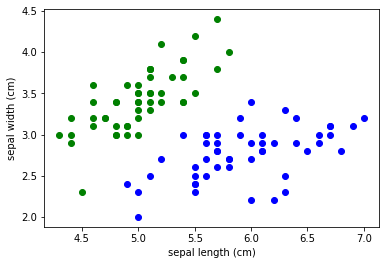

In [ ]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue')

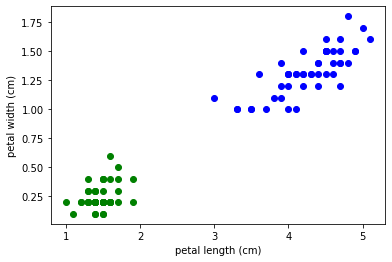

In [ ]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue')

# Pre processing for PCA

## Separate features and labels

In [ ]:
# Separating out the features
X = df.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
# Separating out the target
Y = df.loc[:,['target']].values

## Standardize the data

In [ ]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

# PCA

## Apply PCA

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()
finalDf

,principal component 1,principal component 2,target
0,-1.054757,0.221883,0
1,-0.964954,-0.682883,0
2,-1.219205,-0.437545,0
3,-1.173951,-0.638601,0
4,-1.165155,0.345653,0
...,...,...,...
295,-0.913882,-0.782684,0
296,-0.835601,0.194368,0
297,-1.891726,-1.109727,0
298,-1.044675,-0.408077,0


## Visualize 2 dimension projection

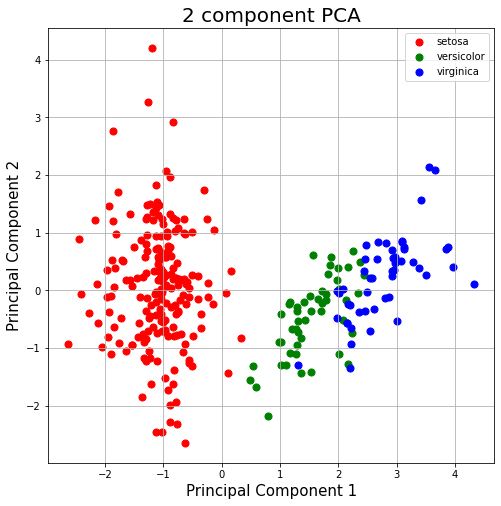

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['setosa', 'versicolor', 'virginica'])
ax.grid()

# Split training and test set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    finalDf[['principal component 1',	'principal component 2']],finalDf[['target']],
    test_size=0.2,random_state=42)

#SVM experiments

## Training

In [ ]:
h = .02  # step size in the mesh

In [ ]:
svc = svm.SVC(kernel='linear', C=3).fit(x_train.values, y_train.values.ravel())
lin_svc = svm.LinearSVC(C=0.1).fit(x_train.values, y_train.values.ravel())
rbf1_svc = svm.SVC(kernel='rbf', gamma=0.5, C=3).fit(x_train.values, y_train.values.ravel()) #1, 3
rbf2_svc = svm.SVC(kernel='rbf', gamma=1.5, C=1).fit(x_train.values, y_train.values.ravel())
poly3_svc = svm.SVC(kernel='poly', degree=3, C=1).fit(x_train.values, y_train.values.ravel())
poly4_svc = svm.SVC(kernel='poly', degree=3, C=3).fit(x_train.values, y_train.values.ravel())

In [ ]:
y_predtrain = svc.predict(x_train)
y_predtest = svc.predict(x_test)
acc_train = accuracy_score(y_train, y_predtrain)
acc_test = accuracy_score(y_test, y_predtest)
print("Train accuracy svc: ", acc_train)
print("Test accuracy svc: ", acc_test, "\n")

y_predtrain = lin_svc.predict(x_train)
y_predtest = lin_svc.predict(x_test)
acc_train = accuracy_score(y_train, y_predtrain)
acc_test = accuracy_score(y_test, y_predtest)
print("Train accuracy lin_svc: ", acc_train)
print("Test accuracy lin_svc: ", acc_test, "\n")

y_predtrain = rbf1_svc.predict(x_train)
y_predtest = rbf1_svc.predict(x_test)
acc_train = accuracy_score(y_train, y_predtrain)
acc_test = accuracy_score(y_test, y_predtest)
print("Train accuracy rbf1_svc: ", acc_train)
print("Test accuracy rbf1_svc: ", acc_test, "\n")

y_predtrain = rbf2_svc.predict(x_train)
y_predtest = rbf2_svc.predict(x_test)
acc_train = accuracy_score(y_train, y_predtrain)
acc_test = accuracy_score(y_test, y_predtest)
print("Train accuracy rbf2_svc: ", acc_train)
print("Test accuracy rbf2_svc: ", acc_test, "\n")

y_predtrain = poly3_svc.predict(x_train)
y_predtest = poly3_svc.predict(x_test)
acc_train = accuracy_score(y_train, y_predtrain)
acc_test = accuracy_score(y_test, y_predtest)
print("Train accuracy poly3_svc: ", acc_train)
print("Test accuracy poly3_svc: ", acc_test, "\n")

y_predtrain = poly4_svc.predict(x_train)
y_predtest = poly4_svc.predict(x_test)
acc_train = accuracy_score(y_train, y_predtrain)
acc_test = accuracy_score(y_test, y_predtest)
print("Train accuracy poly4_svc: ", acc_train)
print("Test accuracy poly4_svc: ", acc_test, "\n")

Train accuracy svc:  0.9666666666666667
Test accuracy svc:  0.95 

Train accuracy lin_svc:  0.9166666666666666
Test accuracy lin_svc:  0.95 

Train accuracy rbf1_svc:  0.9666666666666667
Test accuracy rbf1_svc:  0.95 

Train accuracy rbf2_svc:  0.9666666666666667
Test accuracy rbf2_svc:  0.95 

Train accuracy poly3_svc:  0.9625
Test accuracy poly3_svc:  0.9 

Train accuracy poly4_svc:  0.9666666666666667
Test accuracy poly4_svc:  0.9166666666666666 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has fea

## Plots

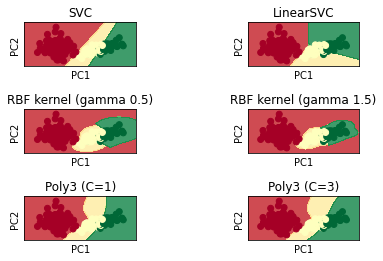

In [ ]:
# create a mesh to plot in
x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC',
          'LinearSVC',
          'RBF kernel (gamma 0.5)',
          'RBF kernel (gamma 1.5)',
          'Poly3 (C=1)',
          'Poly3 (C=3)']


for i, clf in enumerate((svc, lin_svc, rbf1_svc, rbf2_svc, poly3_svc, poly4_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=1, hspace=1)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.8)

    # Plot also the training points
    plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train.values.ravel(), cmap=plt.cm.RdYlGn)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()